In [34]:
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

C:\Users\thanw\AppData\Local\Temp\ipykernel_16876\3035684640.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [35]:
def parser(x):
    return datetime.strptime(x, '%Y')
df = pd.read_csv('2022_HiMCM_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
df = df.iloc[:, :1]
df

C:\Users\thanw\AppData\Local\Temp\ipykernel_16876\522550685.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('2022_HiMCM_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


,PPM
Year,
1959-01-01,315.98
1960-01-01,316.91
1961-01-01,317.64
1962-01-01,318.45
1963-01-01,318.99
...,...
2017-01-01,406.76
2018-01-01,408.72
2019-01-01,411.66


In [36]:
train = df['PPM'].iloc[:50]
test = df['PPM'].iloc[50:]

<BarContainer object of 16 artists>

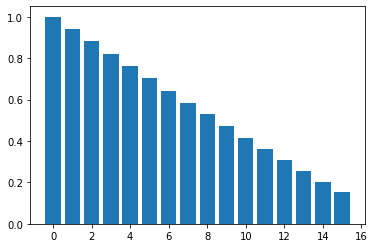

In [37]:
from statsmodels.tsa.stattools import acf
acf_vals = acf(train)
num_lags = 16
plt.bar(range(num_lags), acf_vals[:num_lags])

In [38]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['PPM'], trace=True, suppress_warning=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=92.395, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=118.907, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=111.563, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=91.956, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=93.952, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=93.945, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=94.080, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.196 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -43.978
Date:                Sun, 13 Nov 2022   AIC                             91.956
Time:                        20:35:33   BIC                             96.177
Sample:                             0   HQIC                            93.610
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7778      0.106     -7.327      0.000      -0.986      -0.570
sigma2         0.2439      0.038      6.353      0.000       0.169       0.319
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 5.17
Prob(Q):                              0.50   Prob(JB):                         0.08
Heteroskedasticity (H):               0.90   Skew:                             0.70
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model = ARIMA(train, order=(0,2,1))
model = model.fit()
model.summary()

C:\Users\thanw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\thanw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\thanw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    PPM   No. Observations:                   50
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -34.778
Date:                Sun, 13 Nov 2022   AIC                             73.557
Time:                        20:35:36   BIC                             77.299
Sample:                    01-01-1959   HQIC                            74.971
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7860      0.115     -6.842      0.000      -1.011      -0.561
sigma2         0.2444      0.042      5.783      0.000       0.162       0.327
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.95
Prob(Q):                              0.82   Prob(JB):                         0.14
Heteroskedasticity (H):               1.48   Skew:                             0.68
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
predictions = []
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history, order=(0,2,1))
    model = model.fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=387.769921, expected=387.640000
predicted=389.551783, expected=390.100000
predicted=392.130144, expected=391.850000
predicted=393.818483, expected=394.060000
predicted=396.079931, expected=396.740000
predicted=398.906879, expected=398.810000
predicted=400.954010, expected=401.010000
predicted=403.166532, expected=404.410000
predicted=406.864654, expected=406.760000
predicted=409.185583, expected=408.720000
predicted=411.033008, expected=411.660000
predicted=414.116248, expected=414.240000
predicted=416.725954, expected=416.450000


In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.493


In [42]:
from statsmodels.tsa.arima.model import ARIMAResults
model.predict(start=64, end=92)

array([421.69786306, 424.18381742, 426.66977177, 429.15572612,
       431.64168048, 434.12763483, 436.61358919, 439.09954354,
       441.5854979 , 444.07145225, 446.5574066 , 449.04336096,
       451.52931531, 454.01526967, 456.50122402, 458.98717837,
       461.47313273, 463.95908708, 466.44504144, 468.93099579,
       471.41695014, 473.9029045 , 476.38885885, 478.87481321,
       481.36076756, 483.84672191, 486.33267627, 488.81863062,
       491.30458498])

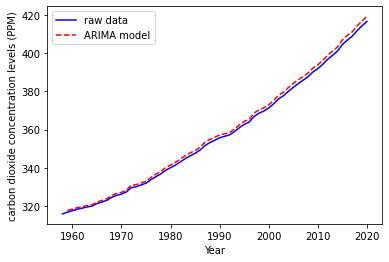

In [43]:
plt.plot(range(1958,2021), df['PPM'], c='blue', label='raw data')
plt.plot(range(1959,2021), model.predict(start=2, end=63), c='red', ls='--', label='ARIMA model')
plt.xlabel('Year')
plt.ylabel('carbon dioxide concentration levels (PPM)')
plt.legend()

In [44]:
OrgYear = 2127
a = OrgYear - 1957
predict = model.predict(start=92, end=a)   #Year 2130
predict[-1]

685.2090245959135